# Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images[0,1]

array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

Normalize pixel values to be between 0 and 1

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
train_images[0,1]

array([[0.0627451 , 0.07843137, 0.07843137],
       [0.        , 0.        , 0.        ],
       [0.07058824, 0.03137255, 0.        ],
       [0.2       , 0.10588235, 0.03137255],
       [0.34509804, 0.2       , 0.08235294],
       [0.47058824, 0.32156863, 0.16862745],
       [0.50196078, 0.34901961, 0.17647059],
       [0.49803922, 0.3372549 , 0.17254902],
       [0.49411765, 0.34117647, 0.19607843],
       [0.45490196, 0.30980392, 0.17254902],
       [0.41568627, 0.2745098 , 0.14509804],
       [0.39607843, 0.2627451 , 0.1372549 ],
       [0.41176471, 0.2745098 , 0.14117647],
       [0.44313725, 0.29019608, 0.1372549 ],
       [0.42745098, 0.2745098 , 0.12941176],
       [0.43921569, 0.28235294, 0.14509804],
       [0.46666667, 0.30980392, 0.17254902],
       [0.42745098, 0.27843137, 0.12941176],
       [0.41176471, 0.27058824, 0.10588235],
       [0.49019608, 0.34901961, 0.18039216],
       [0.49803922, 0.36078431, 0.18039216],
       [0.47843137, 0.33333333, 0.15294118],
       [0.

# Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

The labels:

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

sow the CIFAR labels is a arrays

In [7]:
train_labels[0][0]

6

the corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

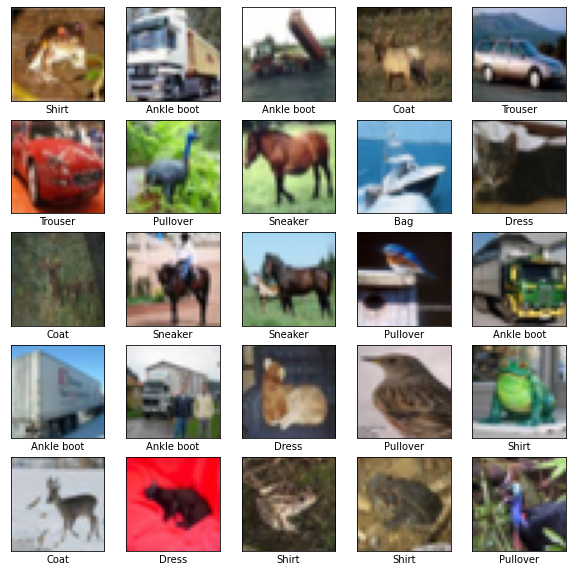

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
train_images.shape

(50000, 32, 32, 3)

sow we have  50000 image with a 32 , 32 in there shape

# Create the convolutional base

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________



Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.5476 - accuracy: 0.4358 - val_loss: 1.2565 - val_accuracy: 0.5502
Epoch 2/10
1563/1563 [==============================] - 115s 73ms/step - loss: 1.1714 - accuracy: 0.5860 - val_loss: 1.1158 - val_accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.0261 - accuracy: 0.6378 - val_loss: 1.0486 - val_accuracy: 0.6326
Epoch 4/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.9331 - accuracy: 0.6725 - val_loss: 0.9658 - val_accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 115s 74ms/step - loss: 0.8647 - accuracy: 0.6968 - val_loss: 0.9458 - val_accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.8129 - accuracy: 0.7146 - val_loss: 0.8991 - val_accuracy: 0.6921
Epoch 7/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.7632 - accuracy: 0.7307 - val_loss: 0

# Evaluate the model

313/313 - 5s - loss: 0.8927 - accuracy: 0.7026


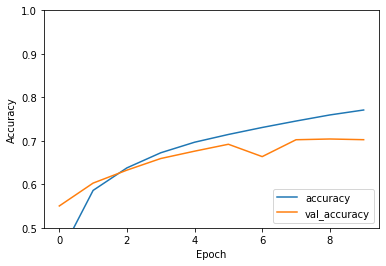

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss1, test_acc1 = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
print(test_acc1)

0.7026000022888184


now we go delet one MaxPooling2D layer to see the effect

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history1 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.4957 - accuracy: 0.4557 - val_loss: 1.2284 - val_accuracy: 0.5616
Epoch 2/10
1563/1563 [==============================] - 185s 118ms/step - loss: 1.1117 - accuracy: 0.6101 - val_loss: 1.0299 - val_accuracy: 0.6378
Epoch 3/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.9476 - accuracy: 0.6693 - val_loss: 0.9457 - val_accuracy: 0.6685
Epoch 4/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.8410 - accuracy: 0.7078 - val_loss: 0.8987 - val_accuracy: 0.6871
Epoch 5/10
1563/1563 [==============================] - 198s 126ms/step - loss: 0.7556 - accuracy: 0.7341 - val_loss: 0.8846 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.6826 - accuracy: 0.7616 - val_loss: 0.9008 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 185s 118ms/step - loss: 0.6140 - accuracy: 0.7836 - val_

313/313 - 7s - loss: 1.0567 - accuracy: 0.6873


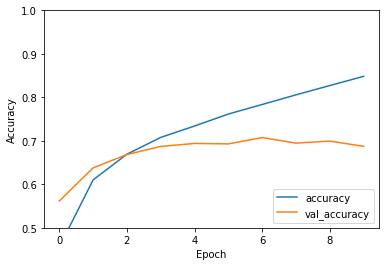

In [22]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model.evaluate(test_images,  test_labels, verbose=2)

now let add more epochs and MaxPooling2D 

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history2 = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5738 - accuracy: 0.4241 - val_loss: 1.2890 - val_accuracy: 0.5367
Epoch 2/20
1563/1563 [==============================] - 62s 40ms/step - loss: 1.2212 - accuracy: 0.5662 - val_loss: 1.1403 - val_accuracy: 0.5921
Epoch 3/20
1563/1563 [==============================] - 87s 55ms/step - loss: 1.0953 - accuracy: 0.6157 - val_loss: 1.0982 - val_accuracy: 0.6201
Epoch 4/20
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0008 - accuracy: 0.6507 - val_loss: 1.0336 - val_accuracy: 0.6361
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9334 - accuracy: 0.6744 - val_loss: 0.9856 - val_accuracy: 0.6552
Epoch 6/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8806 - accuracy: 0.6923 - val_loss: 0.9569 - val_accuracy: 0.6692
Epoch 7/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8316 - accuracy: 0.7097 - val_loss: 0.9594 

313/313 - 3s - loss: 0.9593 - accuracy: 0.6979


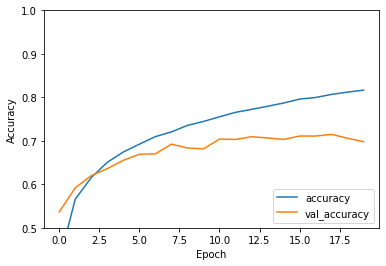

In [26]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss3, test_acc3 = model.evaluate(test_images,  test_labels, verbose=2)

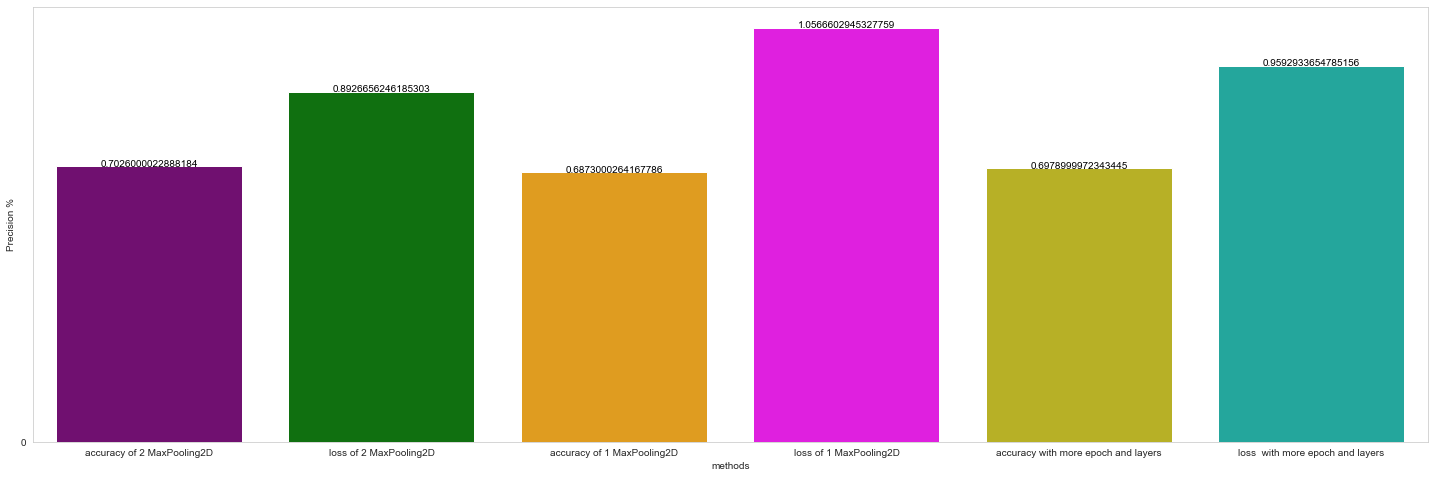

In [41]:
import seaborn as sns
import numpy as np
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]
X=['accuracy of 2 MaxPooling2D','loss of 2 MaxPooling2D','accuracy of 1 MaxPooling2D','loss of 1 MaxPooling2D','accuracy with more epoch and layers','loss  with more epoch and layers']
Y=[test_acc1 , test_loss1 , test_acc2 , test_loss2 , test_acc3 , test_loss3]
sns.set_style("whitegrid")
plt.figure(figsize=(25,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Precision %")
plt.xlabel("methods")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()